In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw08.ipynb")

<img style="display: block; margin-left: auto; margin-right: auto" src="./ccsf-logo.png" width="250rem;" alt="The CCSF black and white logo">

# Homework 8: A/B Testing

## References

* [Comparing Two Samples](https://inferentialthinking.com/chapters/12/Comparing_Two_Samples.html)
* [`datascience` Documentation](https://datascience.readthedocs.io/)
* [Python Quick Reference](https://ccsf-math-108.github.io/materials-fa23/resources/quick_reference.html)

## Assignment Reminders

- Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- For all tasks indicated with a 🔎 that you must write explanations and sentences for, provide your answer in the designated space.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- We encourage you to discuss this assignment with others but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.
- Unless you are asked otherwise, use the non-interactive visualizations when asked to produce a visualization for a task.
- View the related <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page for additional details.

Run the following code cell to import the tools for this assignment.

In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Who is Older?

Data scientists have drawn a simple random sample of size 500 from a large population of adults. Each member of the population happened to identify as either "male" or "female". Data was collected on several attributes of the sampled people, including age. The table `sampled_ages` contains one row for each person in the sample, with columns containing the individual's gender identity.

In [3]:
sampled_ages = Table.read_table('age.csv')
sampled_ages.show(5)

Gender,Age
male,23
male,29
male,29
female,49
female,33


### Task 01 📍

How many females were there in our sample? Please use the provided skeleton code.

*Hint:* Keep in mind that `.group` sorts categories in alphabetical order!

_Points:_ 3

In [4]:
num_females = sampled_ages.group("Gender").column("count").item(0)
num_females

260

In [5]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ num_females is a value betwen 0 and 500.

### Task 02 📍

Complete the cell below so that `avg_male_vs_female` evaluates to `True` if the sampled males are older than the sampled females on average, and `False` otherwise. Use Python code to achieve this.

_Points:_ 3

In [6]:
group_mean_tbl = sampled_ages.group("Gender", np.average)
group_means = group_mean_tbl.column("Age average")       # array of mean ages
avg_male_vs_female = group_means.item(1) > group_means.item(0)
avg_male_vs_female

True

In [7]:
grader.check("task_02")

task_02 results: All test cases passed!
task_02 - 1 message: ✅ avg_male_vs_female is a bool.

### Task 03 📍

The data scientists want to use the data to test whether males are older than females—or, in other words, whether the ages of the two groups have the same distribution. One of the following statements is their null hypothesis and another is their alternative hypothesis. Assign `null_statement_number` and `alternative_statement_number` to the numbers of the correct statements in the code cell below.

1. In the sample, the males and females have the same distribution of ages; the sample averages of the two groups are different due to chance.
2. In the population, the males and females have the same distribution of ages; the sample averages of the two groups are different due to chance.
3. The age distributions of males and females in the population are different due to chance.
4. The males in the sample are older than the females, on average.
5. The males in the population are older than the females, on average.
6. The average ages of the males and females in the population are different.

_Points:_ 3

In [8]:
null_statement_number = 2
alternative_statement_number = 5

In [9]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ null_statement_number is an int.
task_03 - 2 message: ✅ alternative_statement_number is an int.
task_03 - 3 message: ✅ null_statement_number is a number between 1 and 6.
task_03 - 4 message: ✅ alternative_statement_number is a number between 1 and 6.
task_03 - 5 message: ✅ null_statement_number is not the same as alternative_statement_number.

### Task 04 📍

The data scientists have decided to use a permutation test. Assign `permutation_test_reason` to the number corresponding to the reason they made this choice.

1. Since a person's age shouldn't be related to their gender, it doesn't matter who is labeled "male" and who is labeled "female", so you can use permutations.
2. Under the null hypothesis, permuting the labels in the `sampled_ages` table is equivalent to drawing a new random sample with the same number of males and females as in the original sample.
3. Under the null hypothesis, permuting the rows of `sampled_ages` table is equivalent to drawing a new random sample with the same number of males and females as in the original sample.

_Points:_ 3

In [10]:
permutation_test_reason = 1
permutation_test_reason

1

In [11]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ permutation_test_reason is an int.
task_04 - 2 message: ✅ permutation_test_reason is a value between 1 and 3.

### Task 05 📍

To test their hypotheses, the data scientists have followed our textbook's advice and chosen a test statistic where the following statement is true: Large values of the test statistic favor the alternative hypothesis.

The data scientists' test statistic is one of the two options below. Which one is it? Assign the appropriate number to the variable `correct_test_stat`.

1. "male age average - female age average" in a sample created by randomly shuffling the male/female labels
2. "|male age average - female age average|" in a sample created by randomly shuffling the male/female labels

_Points:_ 3

In [17]:
correct_test_stat = 1
correct_test_stat

1

In [18]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ correct_test_stat is an int.
task_05 - 2 message: ✅ correct_test_stat is either 1 or 2.

### Task 06 📍

Complete the cell below so that `observed_statistic_ab` evaluates to the observed value of the data scientists' test statistic. Use as many lines of code as you need, and remember that you can use any quantity, table, or array that you created earlier.

_Points:_ 3

In [23]:
average_table = sampled_ages.group("Gender", np.average)
average = average_table.column(1)
observed_statistic_ab = average.item(1) - average.item(0)
observed_statistic_ab

1.314102564102562

In [24]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ observed_statistic_ab is a float.
task_06 - 2 message: ✅ observed_statistic_ab is 0 or larger.

### Task 07 📍

Assign `shuffled_labels` to an array of shuffled male/female labels. The rest of the code puts the array in a table along with the data in `sampled_ages`.

*Note:* Check out [12.1](https://inferentialthinking.com/chapters/12/1/AB_Testing.html#predicting-the-statistic-under-the-null-hypothesis) for a refresher on random permutations.

_Points:_ 3

In [28]:
shuffled_labels = sampled_ages.sample(with_replacement = False).column(0)
original_with_shuffled_labels = sampled_ages.with_columns('Shuffled Label', shuffled_labels)
original_with_shuffled_labels

Gender,Age,Shuffled Label
male,23,male
male,29,male
male,29,male
female,49,male
female,33,male
male,31,male
male,60,male
male,38,male
female,60,male
female,27,female


In [29]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ original_with_shuffled_labels is a Table.
task_07 - 2 message: ✅ The labels for original_with_shuffled_labels are correct.
task_07 - 3 message: ✅ original_with_shuffled_labels has the correct number of rows.

### Task 08 📍

The comparison below uses the array `shuffled_labels` from Task 07 and the count `num_females` from Task 01.

For this comparison, assign the correct number from one of the following options to the variable `correct_q8`. **Pretend this is a midterm problem and solve it without doing the calculation in a code cell.**

`comp = np.count_nonzero(shuffled_labels == 'female') == num_females`

1. `comp` is set to `True`.
2. `comp` is set to `False`.
3. `comp` is set to `True` or `False`, depending on how the shuffle came out.

_Points:_ 3

In [32]:
correct_q8 = 1
correct_q8

1

In [33]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ correct_q8 is an int.
task_08 - 2 message: ✅ correct_q8 is a number between 1 and 3.

### Task 09 📍

Define a function `simulate_one_statistic` that takes no arguments and returns one simulated value of the test statistic. We've given you a skeleton, but feel free to approach this question in a way that makes sense to you. Use as many lines of code as you need. Refer to the code you have previously written in this problem, as you might be able to re-use some of it.

In [35]:
def simulate_one_statistic():
    "Returns one value of our simulated test statistic"
    shuffled_labels = sampled_ages.sample(with_replacement = False).column("Gender")
    shuffled_tbl = sampled_ages.select("Age").with_column("Shuffled Label", shuffled_labels)
    group_means = shuffled_tbl.group("Shuffled Label", np.average) 
    groups = group_means.column(1)
    return groups.item(1) - groups.item(0)

After you have defined your function, run the following cell a few times to see how the statistic varies.

_Points:_ 3

In [38]:
simulate_one_statistic()

0.8012820512820511

In [ ]:
grader.check("task_09")

### Task 10 📍

Complete the cell to simulate 4,000 values of the statistic. We have included the code that draws the empirical distribution of the statistic and shows the value of `observed_statistic_ab` from Task 06. Feel free to use as many lines of code as you need.

*Note:* This cell will take around one minute to run.

_Points:_ 3

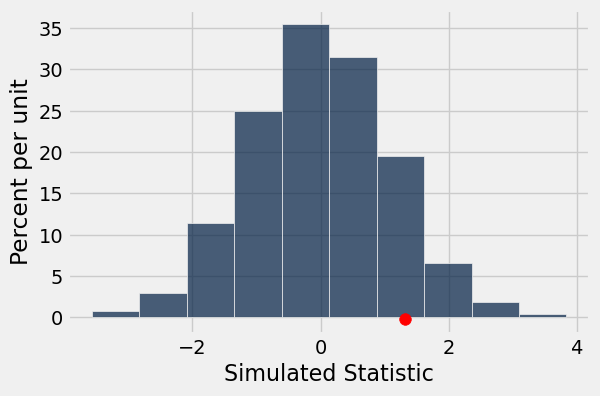

In [48]:
repetitions = 4000

simulated_statistics_ab = make_array()

for _ in range(repetitions):
    # Simulate one value of the statistic and append it to the array
    simulated_statistic = simulate_one_statistic()
    simulated_statistics_ab = np.append(simulated_statistics_ab, simulated_statistic)

# Do not change these lines
Table().with_columns('Simulated Statistic', simulated_statistics_ab).hist()
plt.scatter(observed_statistic_ab, -0.002, color='red', s=70);


In [49]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ simulated_statistics_ab has 4,000 elements.

### Task 11 📍

Use the simulation to find an empirical approximation to the p-value. Assign `p_val` to the appropriate p-value from this simulation. Then, assign `conclusion` to either the name `null_hyp` or the name `alt_hyp`.

*Note:* Assume that we use the 5% cutoff for the p-value.

_Points:_ 3

In [50]:
# These are variables provided for you to use.
null_hyp = 'The data are consistent with the null hypothesis.'
alt_hyp = 'The data support the alternative more than the null.'

p_val = np.count_nonzero(simulated_statistics_ab >= observed_statistic_ab) / repetitions 
conclusion = null_hyp

p_val, conclusion # Do not change this line

(0.10625, 'The data are consistent with the null hypothesis.')

In [51]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: ✅ p_val is a float.
task_11 - 2 message: ✅ p_val is a number between 0 and 1.
task_11 - 3 message: ✅ conclusion is a string.
task_11 - 4 message: ✅ conclusion represents null_hyp or alt_hyp.

## Submit your Homework to Canvas

Once you have finished working on the homework tasks, prepare to submit your work in Canvas by completing the following steps.

1. In the related Canvas Assignment page, check the rubric to know how you will be scored for this assignment.
2. Double-check that you have run the code cell near the end of the notebook that contains the command `"grader.check_all()"`. This command will run all of the run tests on all your responses to the auto-graded tasks marked with 📍.
3. Double-check your responses to the manually graded tasks marked with 📍🔎.
3. Select the menu item "File" and "Save Notebook" in the notebook's Toolbar to save your work and create a specific checkpoint in the notebook's work history.
4. Select the menu items "File", "Download" in the notebook's Toolbar to download the notebook (.ipynb) file. 
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded .ipynb file.

**Keep in mind that the autograder does not always check for correctness. Sometimes it just checks for the format of your answer, so passing the autograder for a question does not mean you got the answer correct for that question.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [52]:
grader.check_all()

task_01 results: All test cases passed!
task_01 - 1 message: ✅ num_females is a value betwen 0 and 500.

task_02 results: All test cases passed!
task_02 - 1 message: ✅ avg_male_vs_female is a bool.

task_03 results: All test cases passed!
task_03 - 1 message: ✅ null_statement_number is an int.
task_03 - 2 message: ✅ alternative_statement_number is an int.
task_03 - 3 message: ✅ null_statement_number is a number between 1 and 6.
task_03 - 4 message: ✅ alternative_statement_number is a number between 1 and 6.
task_03 - 5 message: ✅ null_statement_number is not the same as alternative_statement_number.

task_04 results: All test cases passed!
task_04 - 1 message: ✅ permutation_test_reason is an int.
task_04 - 2 message: ✅ permutation_test_reason is a value between 1 and 3.

task_05 results: All test cases passed!
task_05 - 1 message: ✅ correct_test_stat is an int.
task_05 - 2 message: ✅ correct_test_stat is either 1 or 2.

task_06 results: All test cases passed!
task_06 - 1 message: ✅ obs